In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv(r'G:\AI\AI\Homework AI\lesson-18\classwork\telecustomers.csv')

X = df.drop(columns='custcat').values
y = df['custcat'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
X_new = X_test[0]

In [60]:
# set up hyperparams 
K=5

In [61]:
X_new

array([ 1., 48., 41.,  0., 21., 43.,  2.,  7.,  0.,  0.,  1.])

In [12]:
X_train[:10]

array([[  2.,  13.,  33.,   1.,   9.,  19.,   4.,   0.,   0.,   1.,   2.],
       [  3.,  31.,  34.,   0.,   9., 105.,   4.,   7.,   0.,   1.,   4.],
       [  1.,  72.,  75.,   0.,  37.,  33.,   1.,  44.,   1.,   1.,   1.],
       [  1.,  10.,  23.,   0.,   4.,  36.,   2.,   1.,   0.,   0.,   3.],
       [  1.,  72.,  59.,   1.,  12.,  65.,   3.,  21.,   0.,   1.,   6.],
       [  2.,  19.,  26.,   0.,   2.,  48.,   3.,   0.,   0.,   0.,   2.],
       [  1.,  71.,  45.,   1.,  14.,  86.,   2.,  25.,   0.,   0.,   2.],
       [  1.,  62.,  53.,   0.,  14., 360.,   3.,  26.,   0.,   1.,   2.],
       [  2.,  13.,  38.,   1.,   8., 104.,   4.,   6.,   0.,   0.,   7.],
       [  3.,  44.,  31.,   0.,   8.,  16.,   1.,   3.,   0.,   0.,   1.]])

In [13]:
X_new-X_train[:10]

array([[  -1.,   35.,    8.,   -1.,   12.,   24.,   -2.,    7.,    0.,
          -1.,   -1.],
       [  -2.,   17.,    7.,    0.,   12.,  -62.,   -2.,    0.,    0.,
          -1.,   -3.],
       [   0.,  -24.,  -34.,    0.,  -16.,   10.,    1.,  -37.,   -1.,
          -1.,    0.],
       [   0.,   38.,   18.,    0.,   17.,    7.,    0.,    6.,    0.,
           0.,   -2.],
       [   0.,  -24.,  -18.,   -1.,    9.,  -22.,   -1.,  -14.,    0.,
          -1.,   -5.],
       [  -1.,   29.,   15.,    0.,   19.,   -5.,   -1.,    7.,    0.,
           0.,   -1.],
       [   0.,  -23.,   -4.,   -1.,    7.,  -43.,    0.,  -18.,    0.,
           0.,   -1.],
       [   0.,  -14.,  -12.,    0.,    7., -317.,   -1.,  -19.,    0.,
          -1.,   -1.],
       [  -1.,   35.,    3.,   -1.,   13.,  -61.,   -2.,    1.,    0.,
           0.,   -6.],
       [  -2.,    4.,   10.,    0.,   13.,   27.,    1.,    4.,    0.,
           0.,    0.]])

In [23]:
distances = np.sqrt(np.sum((X_new - X_train)**2, axis=1))
idx = np.argsort(distances)[:K]

In [24]:
idx

array([449, 656, 242, 234, 778], dtype=int64)

In [28]:
classes = y_train[idx]

In [31]:
from collections import Counter
cntr = Counter(classes)
cntr.most_common(2)

[(3, 2), (4, 2)]

In [ ]:
#None parametric model
from collections import Counter
class KNN:
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors

    def fit(self, X, y): 
        self.X = X
        self.y = y
        return self

    def predict(self, X):
        # shape of (m,)
        # m - number of features
        # shape of (n,m)
        # n - observations
        # m - number of features
        distances = np.sqrt(np.sum((X - self.X)**2, axis=1))
        idx = np.argsort(distances)[:self.n_neighbors]
        classes = self.y[idx]
        cntr = Counter(classes)
        return cntr.most_common(1)[0][0].item()


In [41]:
model = KNN(n_neighbors=5)

model.fit(X_train, y_train)
model.predict(X_new)

3

In [11]:
#None parametric model
from collections import Counter
class KNN:
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors

    def fit(self, X, y): 
        self.X = X
        self.y = y
        return self

    def predict(self, X):
        predictions = []
        # shape of (n,m)
        # n - observations
        # m - number of features
        for x in X:
            distances = np.sqrt(np.sum((x - self.X)**2, axis=1))
            idx = np.argsort(distances)[:self.n_neighbors]
            classes = self.y[idx]
            cntr = Counter(classes)
            predictions.append(cntr.most_common(1)[0][0].item())
        return predictions


In [12]:
model = KNN(n_neighbors=5)

model.fit(X_train, y_train)
model.predict(X_test)

[3,
 2,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 4,
 4,
 4,
 2,
 3,
 3,
 4,
 2,
 1,
 1,
 3,
 3,
 4,
 3,
 4,
 4,
 2,
 4,
 1,
 1,
 3,
 1,
 4,
 3,
 4,
 4,
 4,
 3,
 2,
 4,
 2,
 2,
 4,
 2,
 3,
 4,
 3,
 4,
 1,
 3,
 3,
 2,
 3,
 4,
 1,
 3,
 3,
 4,
 1,
 4,
 1,
 3,
 2,
 1,
 2,
 3,
 2,
 1,
 4,
 2,
 3,
 1,
 4,
 3,
 1,
 3,
 4,
 2,
 3,
 3,
 1,
 4,
 3,
 2,
 1,
 1,
 3,
 3,
 1,
 1,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 1,
 4,
 1,
 3,
 4,
 1,
 2,
 4,
 1,
 1,
 3,
 4,
 4,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 3,
 4,
 3,
 3,
 4,
 3,
 3,
 4,
 2,
 4,
 3,
 4,
 4,
 4,
 1,
 3,
 3,
 3,
 2,
 1,
 4,
 2,
 3,
 1,
 4,
 1,
 2,
 3,
 2,
 2,
 1,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 4,
 2,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 4,
 3,
 3,
 1,
 1,
 3,
 2,
 4,
 3,
 2,
 1,
 1,
 1,
 1,
 3,
 4,
 4,
 3,
 1,
 3,
 1,
 2,
 2,
 1,
 3,
 1,
 2,
 4,
 1,
 4,
 1,
 4,
 4,
 3]

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.predict(X_test)

array([3, 2, 1, 3, 1, 1, 1, 1, 1, 4, 4, 4, 2, 3, 3, 4, 2, 1, 1, 3, 3, 4,
       1, 1, 4, 2, 4, 1, 1, 3, 1, 1, 3, 4, 3, 1, 3, 2, 2, 2, 2, 4, 2, 3,
       4, 3, 4, 1, 1, 3, 2, 3, 3, 1, 1, 3, 4, 1, 4, 1, 1, 2, 1, 2, 3, 2,
       1, 4, 1, 1, 1, 2, 3, 1, 3, 4, 2, 2, 2, 1, 4, 3, 2, 1, 1, 3, 3, 1,
       1, 2, 2, 1, 3, 2, 2, 2, 2, 1, 4, 1, 3, 4, 1, 2, 4, 1, 1, 3, 4, 2,
       2, 1, 1, 1, 1, 1, 3, 1, 2, 3, 4, 3, 3, 3, 3, 3, 4, 2, 4, 3, 1, 4,
       4, 1, 1, 2, 3, 2, 1, 3, 2, 3, 1, 2, 1, 2, 2, 2, 1, 1, 1, 3, 2, 3,
       3, 1, 1, 3, 2, 1, 3, 1, 3, 1, 1, 1, 4, 3, 3, 1, 1, 3, 2, 4, 1, 2,
       1, 1, 1, 1, 3, 4, 2, 3, 1, 3, 1, 2, 2, 1, 2, 1, 2, 4, 1, 2, 1, 4,
       4, 3], dtype=int64)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
%matplotlib inline
df = pd.read_csv(r'G:\AI\AI\Homework AI\lesson-18\classwork\telecustomers.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [24]:
X = df.drop(['custcat'], axis = 1)
y = df['custcat']
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Train Model and Predict
k = 4  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=4 is 0.32


Minimum error:- 0.59 at K = 37


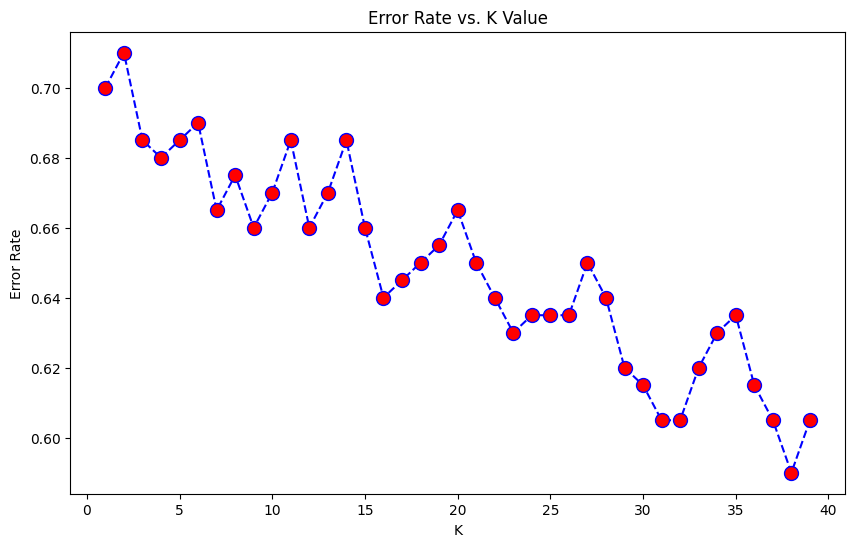

In [25]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.41 at K = 37


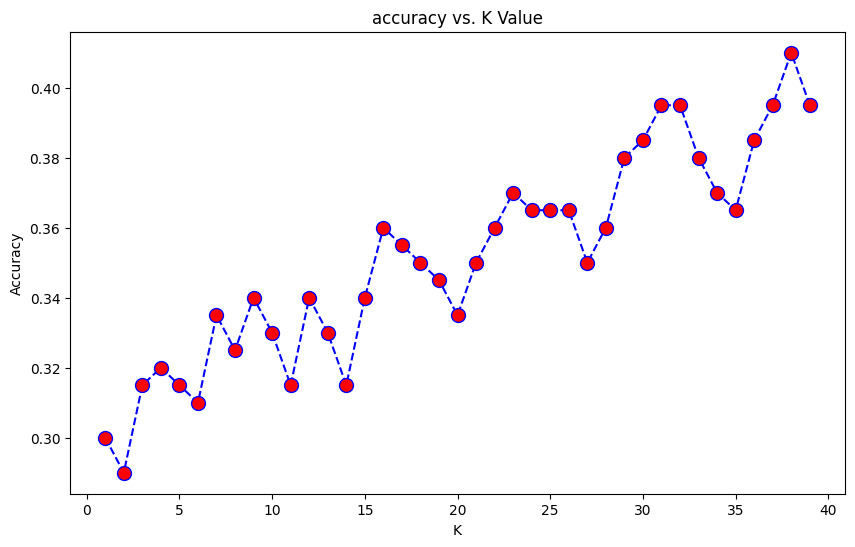

In [26]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))